In [47]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt


In [2]:
tf_e3_corrs_fdrs = pd.read_pickle("pydata/tf_dependency_e3ls_expr_correlation_bylineage_fdr.pkl")

In [3]:
tf_e3_corrs_fdrs_filtered = tf_e3_corrs_fdrs[tf_e3_corrs_fdrs['fdr']< 0.1]

In [4]:
tf_e3_corrs_fdrs_filtered

,lineage,TF,E3_ligase,p-val,corr,TF-class,fdr,log10q
13965,Biliary Tract,DMRT1,PDZRN3,5.360362e-06,0.678751,Positive,0.045134,1.345500
13987,Biliary Tract,POU3F4,PDZRN3,7.373695e-08,0.760493,Positive,0.001012,2.994961
13994,Biliary Tract,TP53,PDZRN3,3.209376e-08,0.773384,Positive,0.000587,3.231287
26689,Biliary Tract,ZNF221,TRIM26,1.404946e-05,-0.655954,Positive,0.096379,1.016016
45325,Biliary Tract,DMRT1,KLHL10,6.492342e-07,0.722565,Positive,0.007126,2.147155
...,...,...,...,...,...,...,...,...
1200646,Uterus,ZNF23,KLHL10,2.196990e-06,0.705633,Positive,0.026698,1.573524
1202051,Uterus,ZNF880,KLHL41,9.777977e-07,-0.722051,Positive,0.026698,1.573524
1207148,Uterus,GRHL1,TLE3,1.270553e-05,-0.665828,Positive,0.085776,1.066632
1210057,Uterus,RBAK,TRIM58,3.175769e-06,-0.697777,Positive,0.032160,1.492685


In [5]:
tf_e3_corrs_fdrs_filtered = tf_e3_corrs_fdrs_filtered[tf_e3_corrs_fdrs_filtered['corr']< 0]

In [6]:
tf_e3_corrs_fdrs_filtered

,lineage,TF,E3_ligase,p-val,corr,TF-class,fdr,log10q
26689,Biliary Tract,ZNF221,TRIM26,1.404946e-05,-0.655954,Positive,0.096379,1.016016
49506,Biliary Tract,HEY2,SOCS1,1.615111e-05,-0.652490,Positive,0.098486,1.006626
112588,Bone,TCF15,BIRC3,1.224955e-05,-0.548149,Positive,0.064524,1.190279
114708,Bone,ZNF331,E4F1,2.508141e-05,-0.531406,Positive,0.079523,1.099508
126409,Bone,ETS2,RNF126,7.207875e-06,-0.559985,Positive,0.064524,1.190279
...,...,...,...,...,...,...,...,...
1187680,Uterus,GRHL1,ZNRF1,1.854143e-06,-0.709168,Positive,0.026698,1.573524
1202051,Uterus,ZNF880,KLHL41,9.777977e-07,-0.722051,Positive,0.026698,1.573524
1207148,Uterus,GRHL1,TLE3,1.270553e-05,-0.665828,Positive,0.085776,1.066632
1210057,Uterus,RBAK,TRIM58,3.175769e-06,-0.697777,Positive,0.032160,1.492685


In [11]:
tf_dependency_e3ls_expr_correlation_bylineage_fdr_significant = pd.read_pickle("pydata/tf_dependency_e3ls_expr_correlation_bylineage_fdr_significant.pkl")

In [13]:
tf_dependency_e3ls_expr_correlation_bylineage_fdr_significant

,lineage,TF,E3_ligase,p-val,corr,TF-class,fdr,log10q,name
14339,Biliary Tract,DMRT1,PDZRN3,5.360362e-06,0.678751,Positive,0.046343,1.334020,DMRT1-PDZRN3
14362,Biliary Tract,POU3F4,PDZRN3,7.373695e-08,0.760493,Positive,0.001039,2.983481,POU3F4-PDZRN3
14369,Biliary Tract,TP53,PDZRN3,3.209376e-08,0.773384,Positive,0.000603,3.219807,TP53-PDZRN3
27405,Biliary Tract,ZNF221,TRIM26,1.404946e-05,-0.655954,Positive,0.098961,1.004536,ZNF221-TRIM26
46539,Biliary Tract,DMRT1,KLHL10,6.492342e-07,0.722565,Positive,0.007317,2.135675,DMRT1-KLHL10
...,...,...,...,...,...,...,...,...,...
1221631,Uterus,ZNF23,KLHL10,2.196990e-06,0.705633,Positive,0.026913,1.570036,ZNF23-KLHL10
1223047,Uterus,ZNF880,KLHL41,9.777977e-07,-0.722051,Positive,0.026913,1.570036,ZNF880-KLHL41
1228185,Uterus,GRHL1,TLE3,1.270553e-05,-0.665828,Positive,0.086468,1.063144,GRHL1-TLE3
1231118,Uterus,RBAK,TRIM58,3.175769e-06,-0.697777,Positive,0.032419,1.489196,RBAK-TRIM58


In [69]:
num_tf = tf_dependency_e3ls_expr_correlation_bylineage_fdr_significant.groupby(["lineage", "TF-class"]).count()

In [70]:
num_tf=num_tf.reset_index()

In [71]:
num_tf

,lineage,TF-class,TF,E3_ligase,p-val,corr,fdr,log10q,name
0,Biliary Tract,Positive,8,8,8,8,8,8,8
1,Bone,Negative,6,6,6,6,6,6,6
2,Bone,Positive,27,27,27,27,27,27,27
3,Bowel,Negative,1,1,1,1,1,1,1
4,Bowel,Positive,6,6,6,6,6,6,6
5,Breast,Negative,3,3,3,3,3,3,3
6,Breast,Positive,1,1,1,1,1,1,1
7,CNS/Brain,Positive,309,309,309,309,309,309,309
8,Head and Neck,Negative,4,4,4,4,4,4,4
9,Head and Neck,Positive,6,6,6,6,6,6,6


In [73]:
num_tf = num_tf.drop(index=7)

In [74]:
num_tf.sort_values(by='TF', ascending=False)

,lineage,TF-class,TF,E3_ligase,p-val,corr,fdr,log10q,name
12,Lymphoid,Negative,81,81,81,81,81,81,81
20,Skin,Negative,67,67,67,67,67,67,67
13,Lymphoid,Positive,33,33,33,33,33,33,33
2,Bone,Positive,27,27,27,27,27,27,27
10,Lung,Negative,21,21,21,21,21,21,21
21,Skin,Positive,18,18,18,18,18,18,18
11,Lung,Positive,12,12,12,12,12,12,12
23,Uterus,Positive,11,11,11,11,11,11,11
0,Biliary Tract,Positive,8,8,8,8,8,8,8
16,Ovary/Fallopian Tube,Positive,7,7,7,7,7,7,7


In [75]:
num_tf_P = num_tf.loc[num_tf['TF-class']=='Positive', :]
num_tf_N = num_tf.loc[num_tf['TF-class']=='Negative', :]

In [91]:
num_tf_P = num_tf_P.sort_values(by='TF', ascending=True)
num_tf_P

,lineage,TF-class,TF,E3_ligase,p-val,corr,fdr,log10q,name
6,Breast,Positive,1,1,1,1,1,1,1
17,Pancreas,Positive,1,1,1,1,1,1,1
18,Pleura,Positive,2,2,2,2,2,2,2
4,Bowel,Positive,6,6,6,6,6,6,6
9,Head and Neck,Positive,6,6,6,6,6,6,6
16,Ovary/Fallopian Tube,Positive,7,7,7,7,7,7,7
19,Prostate,Positive,7,7,7,7,7,7,7
0,Biliary Tract,Positive,8,8,8,8,8,8,8
23,Uterus,Positive,11,11,11,11,11,11,11
11,Lung,Positive,12,12,12,12,12,12,12


In [92]:
num_tf_N = num_tf_N.sort_values(by='TF', ascending=True)
num_tf_N

,lineage,TF-class,TF,E3_ligase,p-val,corr,fdr,log10q,name
3,Bowel,Negative,1,1,1,1,1,1,1
15,Ovary/Fallopian Tube,Negative,1,1,1,1,1,1,1
22,Uterus,Negative,1,1,1,1,1,1,1
14,Myeloid,Negative,2,2,2,2,2,2,2
5,Breast,Negative,3,3,3,3,3,3,3
8,Head and Neck,Negative,4,4,4,4,4,4,4
1,Bone,Negative,6,6,6,6,6,6,6
10,Lung,Negative,21,21,21,21,21,21,21
20,Skin,Negative,67,67,67,67,67,67,67
12,Lymphoid,Negative,81,81,81,81,81,81,81


In [109]:
num_tf_m = pd.merge(num_tf_P, num_tf_N, on= "lineage")

In [110]:
num_tf_m

,lineage,TF-class_x,TF_x,E3_ligase_x,p-val_x,corr_x,fdr_x,log10q_x,name_x,TF-class_y,TF_y,E3_ligase_y,p-val_y,corr_y,fdr_y,log10q_y,name_y
0,Breast,Positive,1,1,1,1,1,1,1,Negative,3,3,3,3,3,3,3
1,Bowel,Positive,6,6,6,6,6,6,6,Negative,1,1,1,1,1,1,1
2,Head and Neck,Positive,6,6,6,6,6,6,6,Negative,4,4,4,4,4,4,4
3,Ovary/Fallopian Tube,Positive,7,7,7,7,7,7,7,Negative,1,1,1,1,1,1,1
4,Uterus,Positive,11,11,11,11,11,11,11,Negative,1,1,1,1,1,1,1
5,Lung,Positive,12,12,12,12,12,12,12,Negative,21,21,21,21,21,21,21
6,Skin,Positive,18,18,18,18,18,18,18,Negative,67,67,67,67,67,67,67
7,Bone,Positive,27,27,27,27,27,27,27,Negative,6,6,6,6,6,6,6
8,Lymphoid,Positive,33,33,33,33,33,33,33,Negative,81,81,81,81,81,81,81


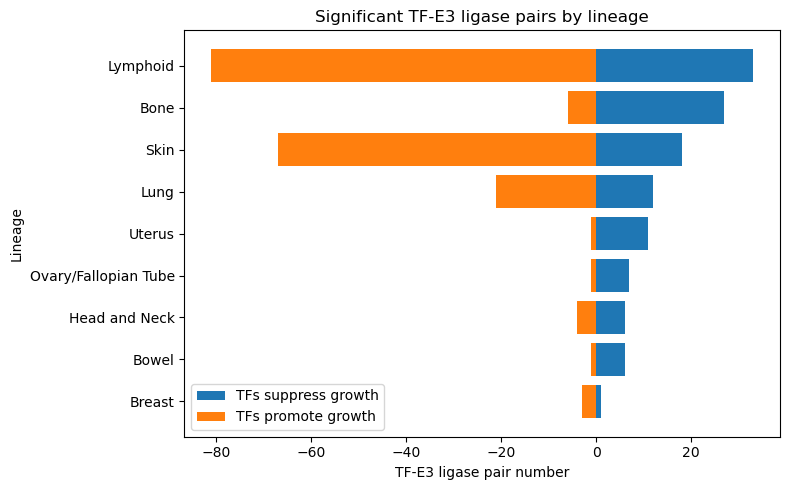

In [125]:
# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the barplot on the main axis (horizontal bars)
ax1.barh(num_tf_m['lineage'], num_tf_m['TF_x'],color = sns.color_palette()[0], label = 'TFs suppress growth')
ax1.barh(num_tf_m['lineage'], -num_tf_m['TF_y'],color = sns.color_palette()[1], label = 'TFs promote growth')
#ax1.barh(num_tf_m['lineage'], -num_tf_m['TF_x'],color = sns.color_palette()[0], label = 'TFs suppress growth')
ax1.set_xlabel('TF-E3 ligase pair number')
ax1.set_ylabel('Lineage')
ax1.set_title('Significant TF-E3 ligase pairs by lineage')

# Adding a legend to differentiate between the two datasets
ax1.legend()

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show plot
plt.show()

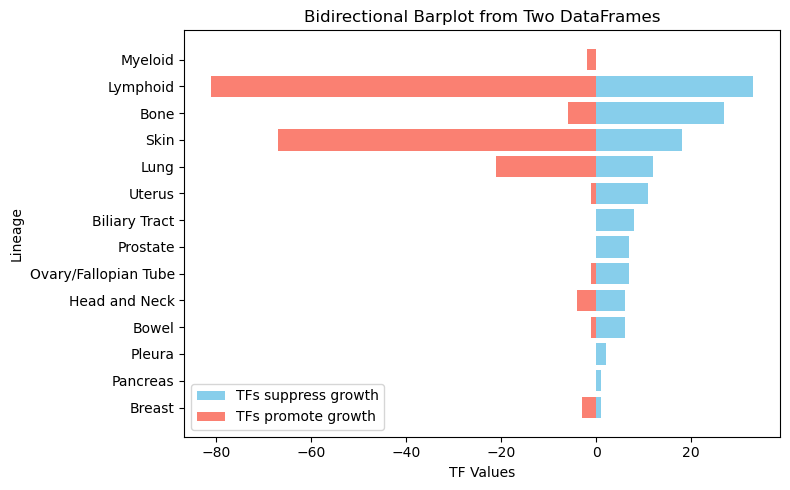

In [93]:
# # Create the figure and axis
# fig, ax1 = plt.subplots(figsize=(8, 5))

# # Plot the barplot on the main axis (horizontal bars)
# ax1.barh(num_tf_P['lineage'], num_tf_P['TF'], color='skyblue',label = 'TFs suppress growth')
# ax1.barh(num_tf_N['lineage'], -num_tf_N['TF'], color='salmon',label = 'TFs promote growth')
# ax1.set_xlabel('TF Values')
# ax1.set_ylabel('Lineage')
# ax1.set_title('Bidirectional Barplot from Two DataFrames')

# # Adding a legend to differentiate between the two datasets
# ax1.legend()

# # Adjust layout to avoid overlapping
# plt.tight_layout()

# # Show plot
# plt.show()

/var/folders/6x/6w9bj9wn3cl8pj2yyxgs7m500000gn/T/ipykernel_46606/3265129105.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


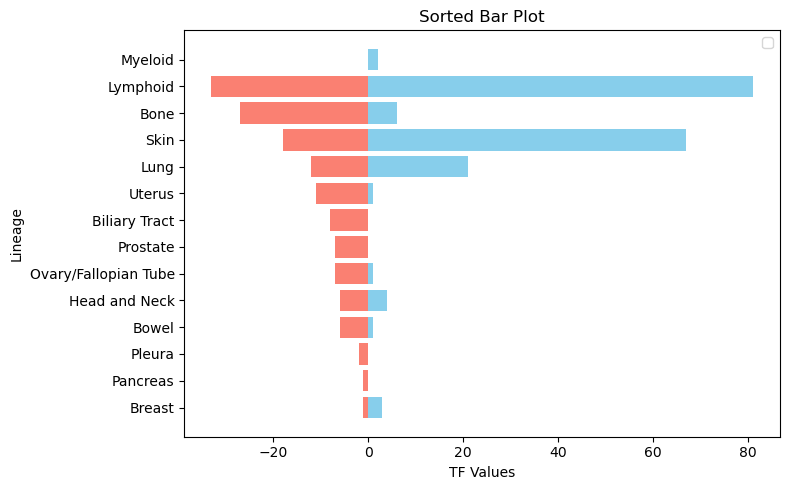

In [100]:
# fig, ax = plt.subplots(figsize=(8, 5))

# ax.barh(num_tf_P.sort_values(by='TF', ascending=True)['lineage'], 
#         -num_tf_P.sort_values(by='TF', ascending=True)['TF'], 
#         color='salmon')

# ax.barh(num_tf_N.sort_values(by='TF', ascending=True)['lineage'], 
#         num_tf_N.sort_values(by='TF', ascending=True)['TF'], 
#         color='skyblue')


# # Add labels
# ax.set_xlabel('TF Values')
# ax.set_ylabel('Lineage')
# ax.set_title('Sorted Bar Plot')

# ax.legend()


# plt.tight_layout()

# plt.show()

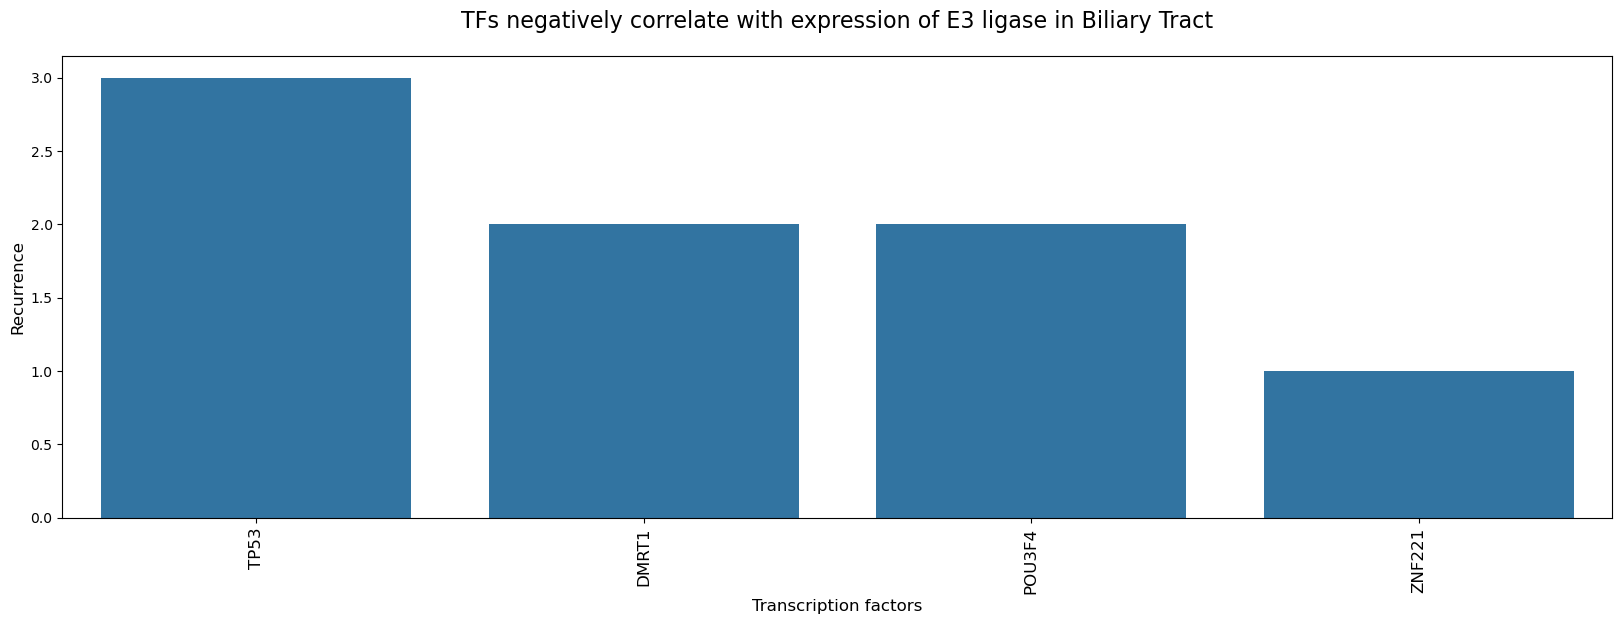

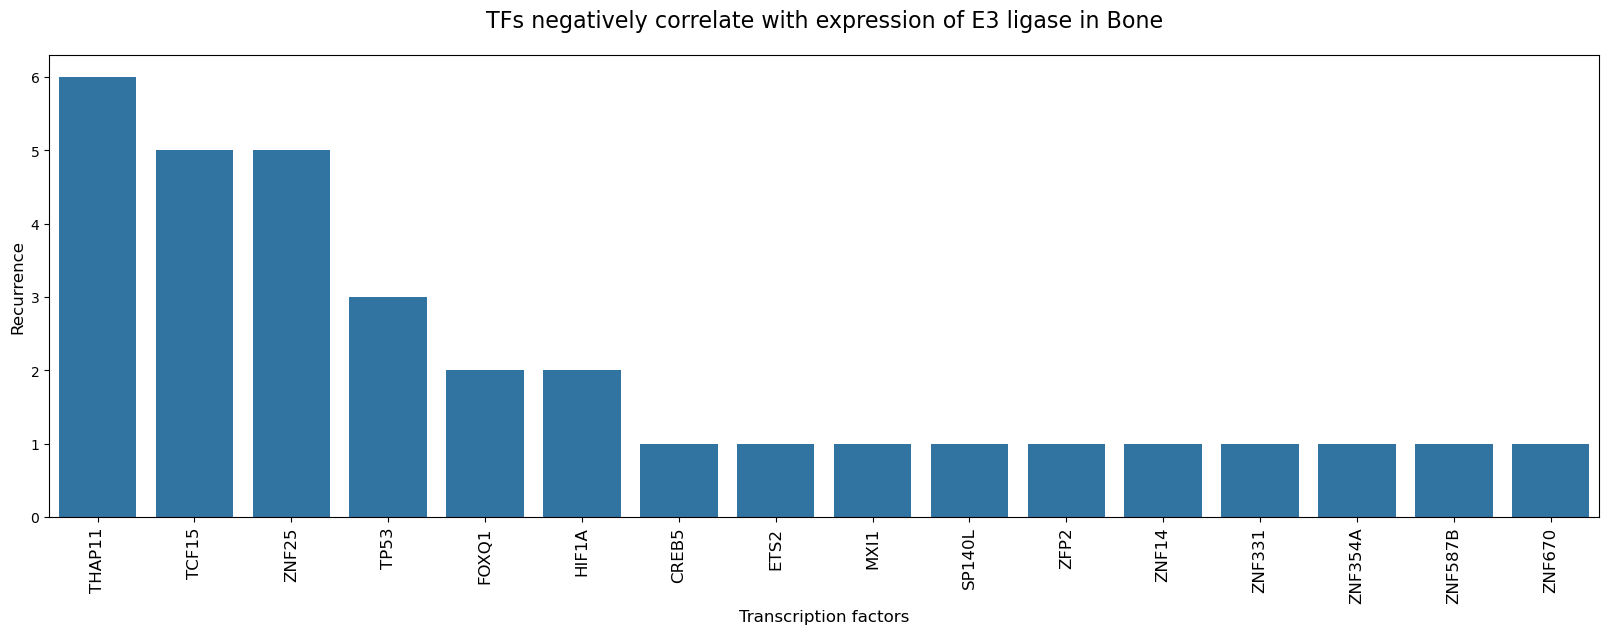

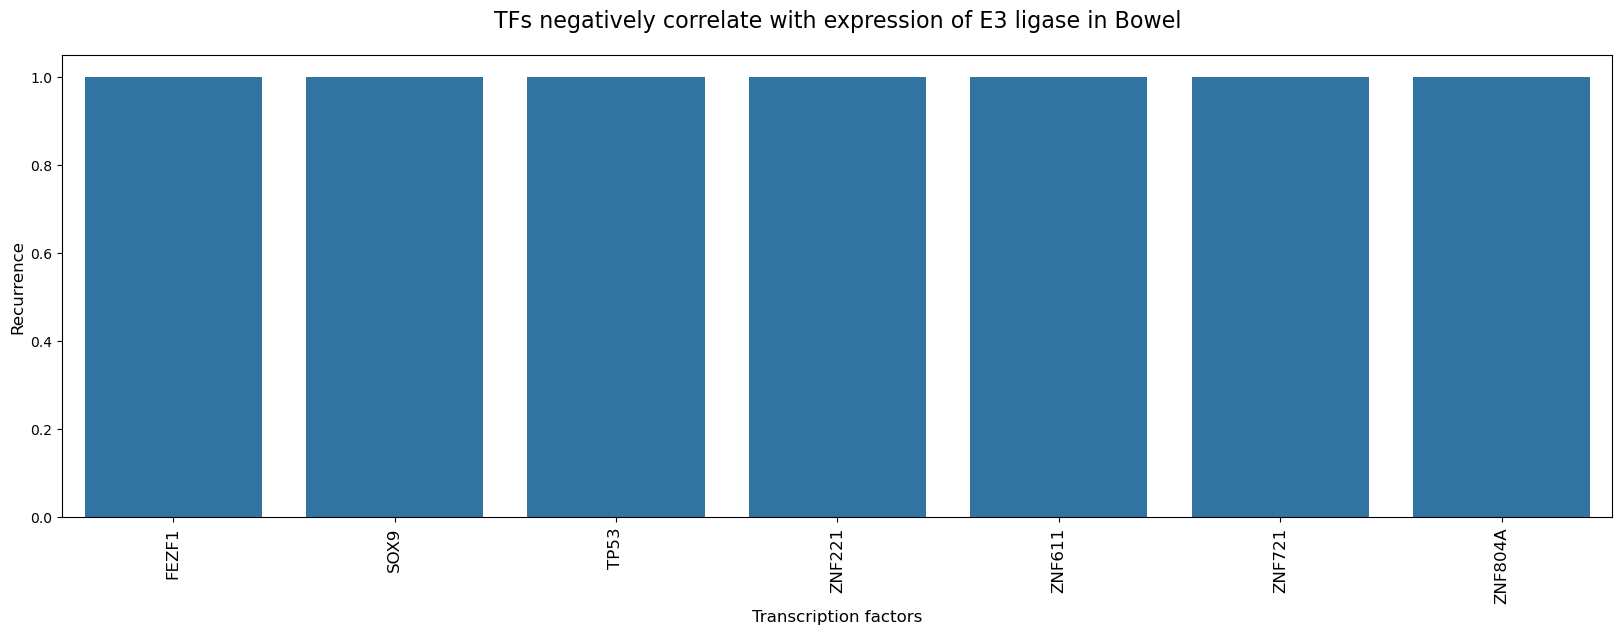

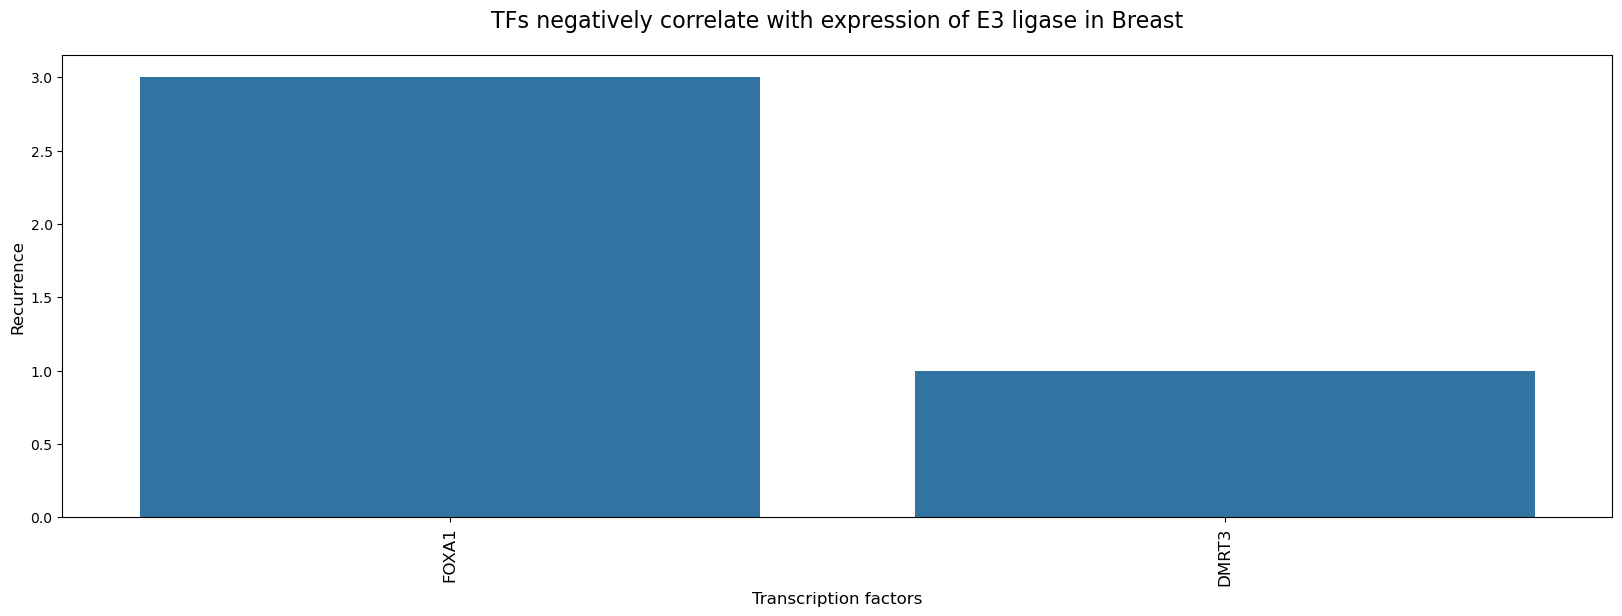

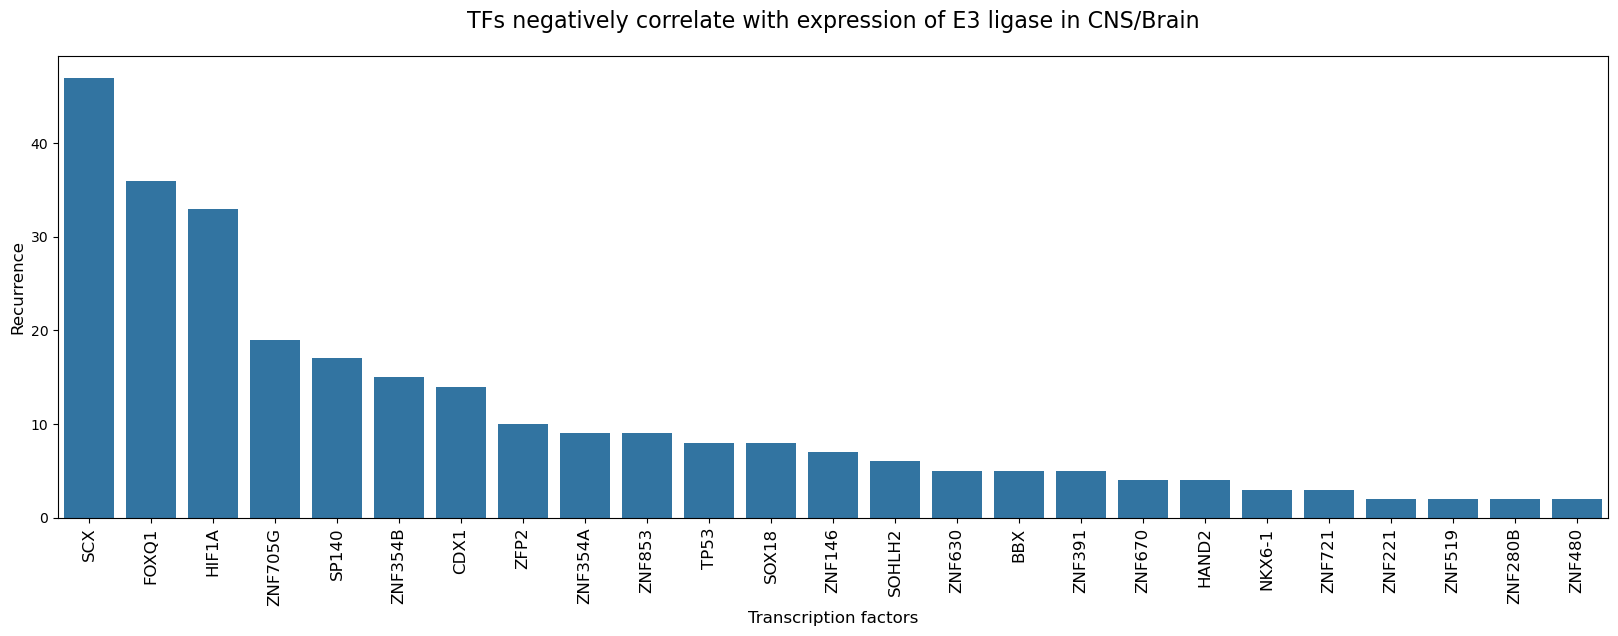

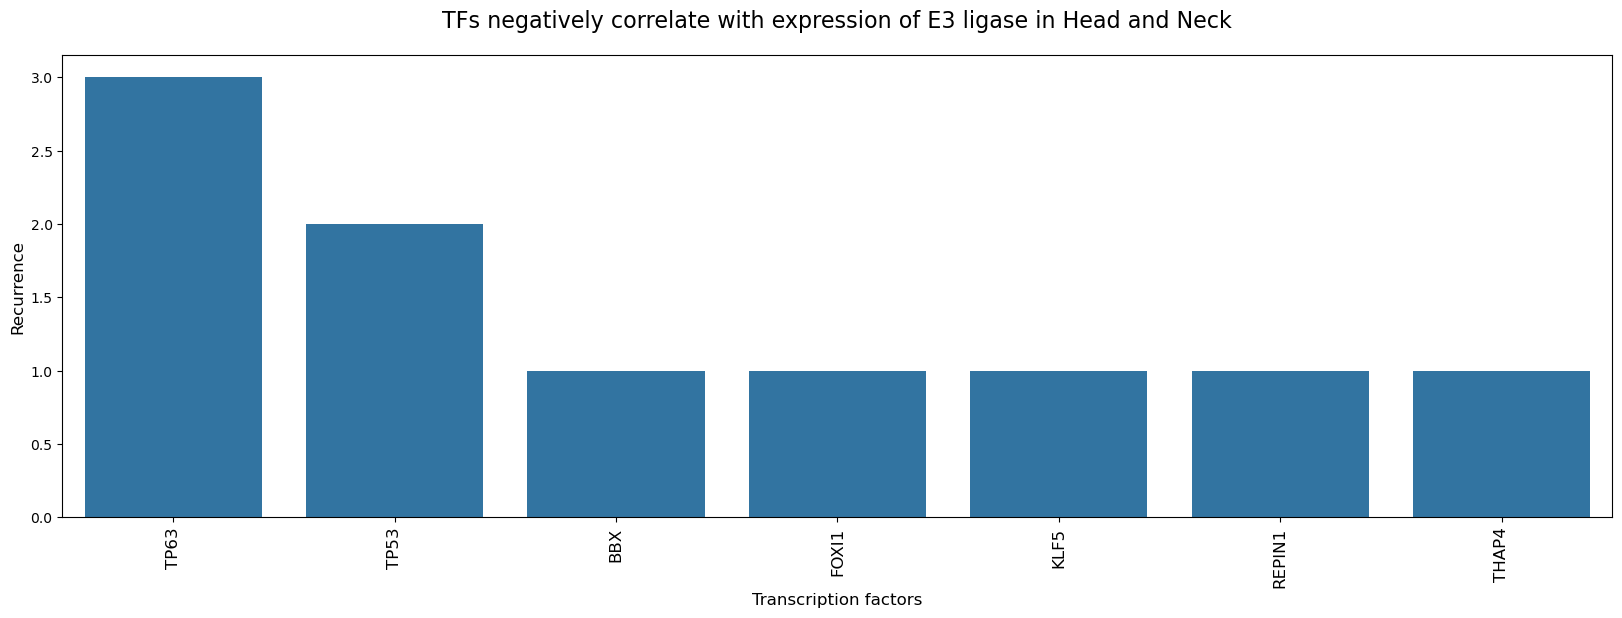

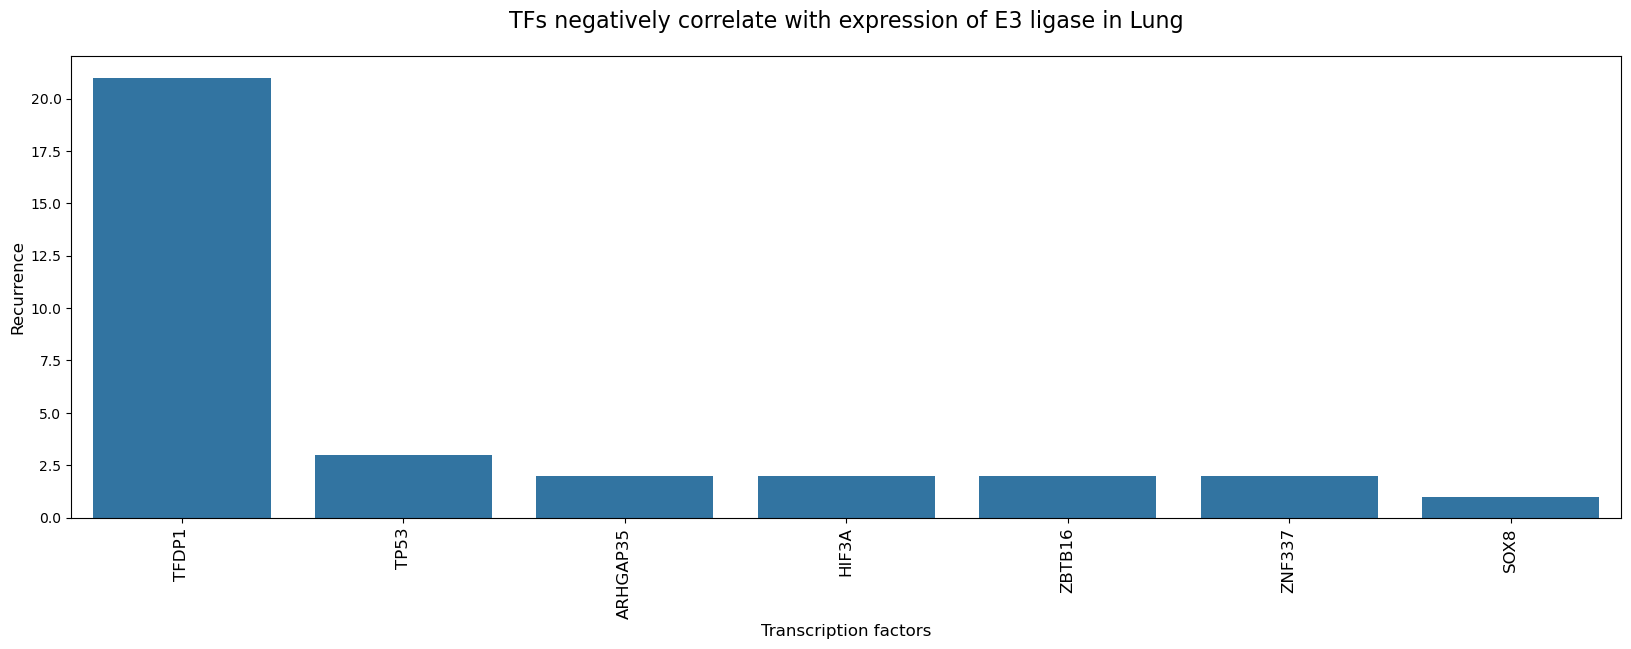

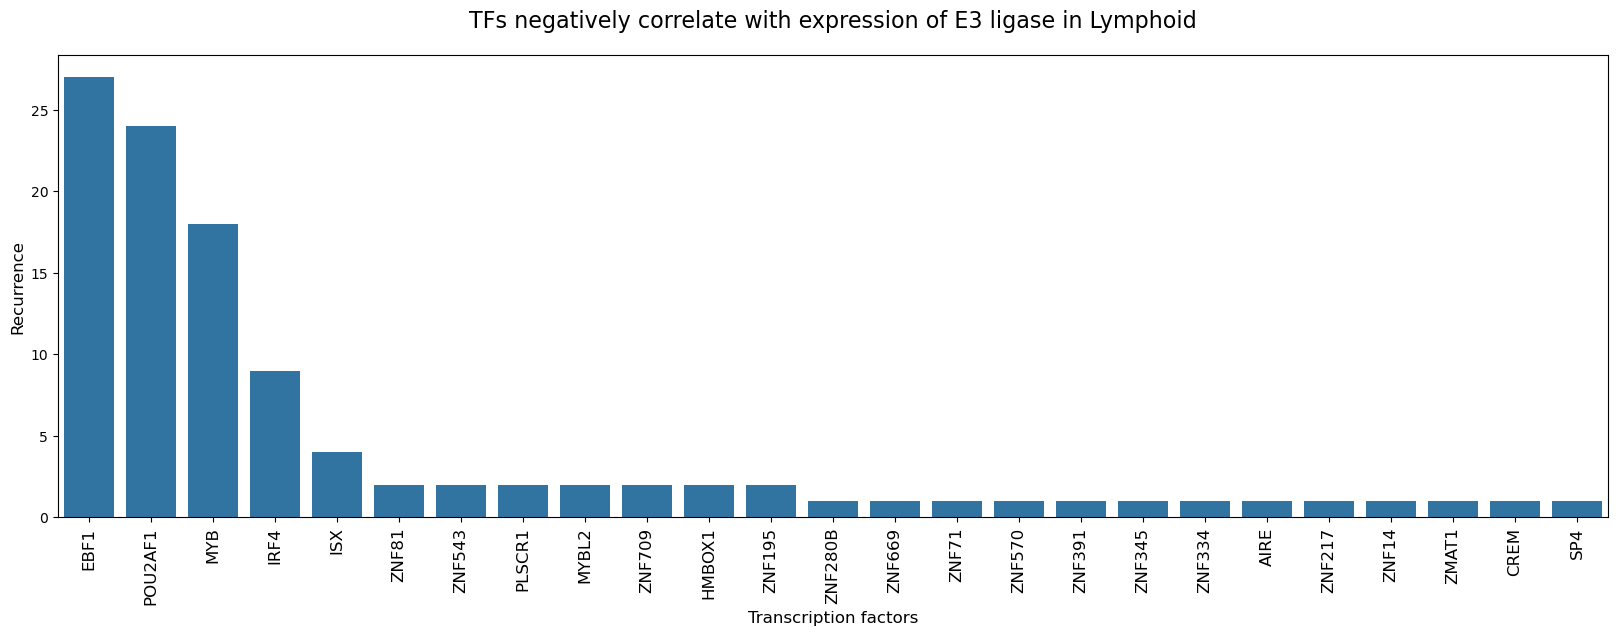

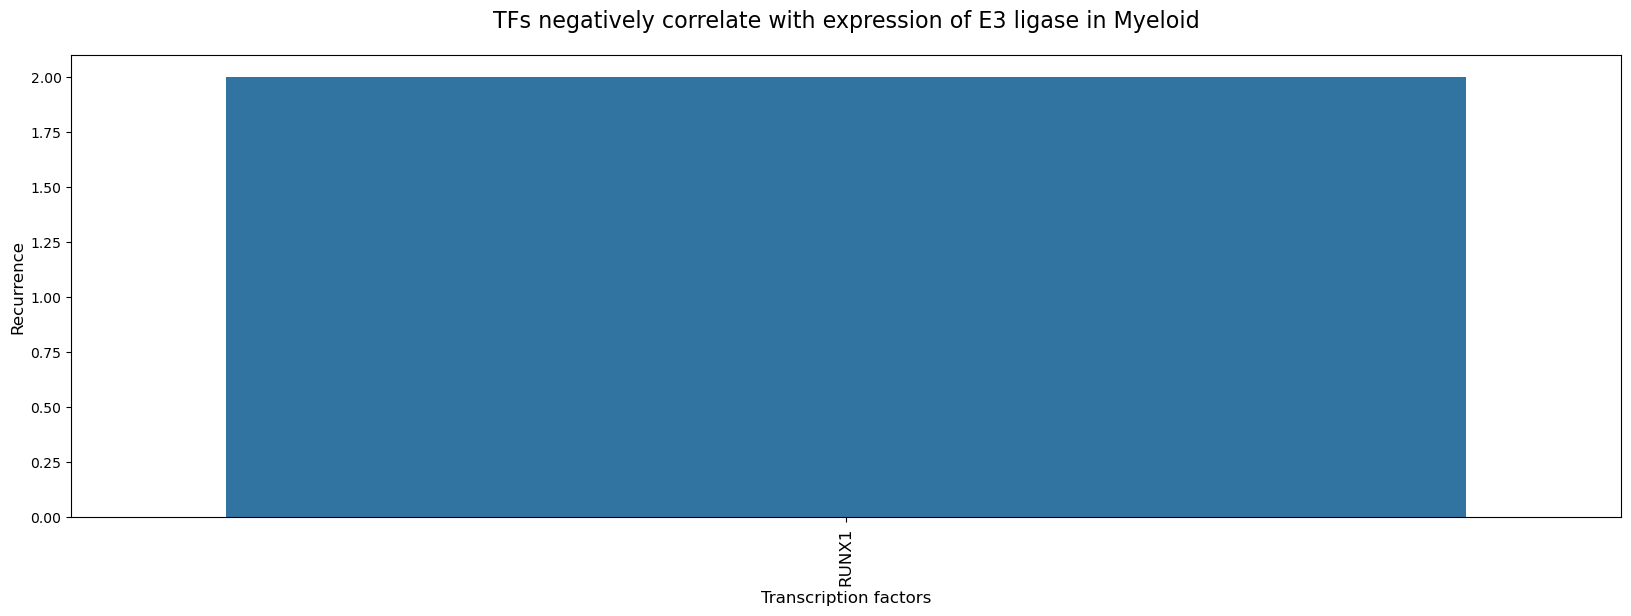

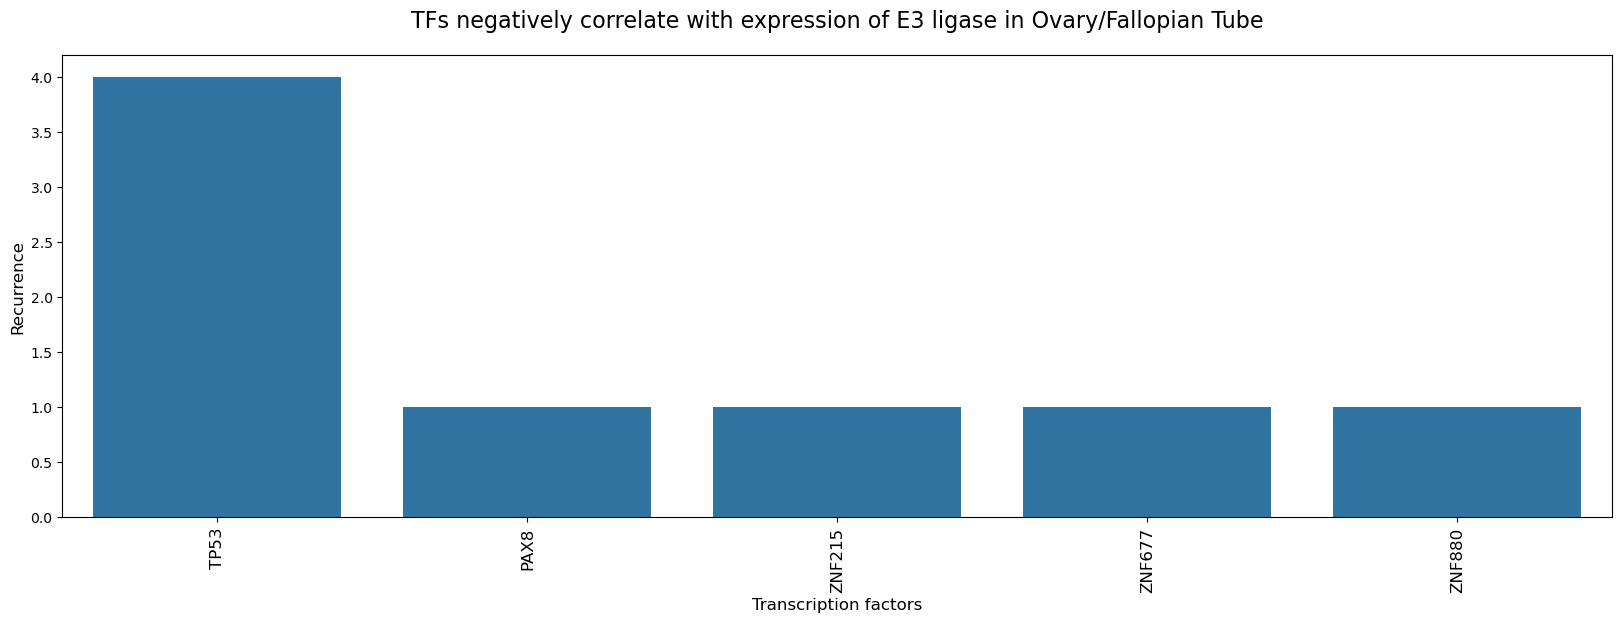

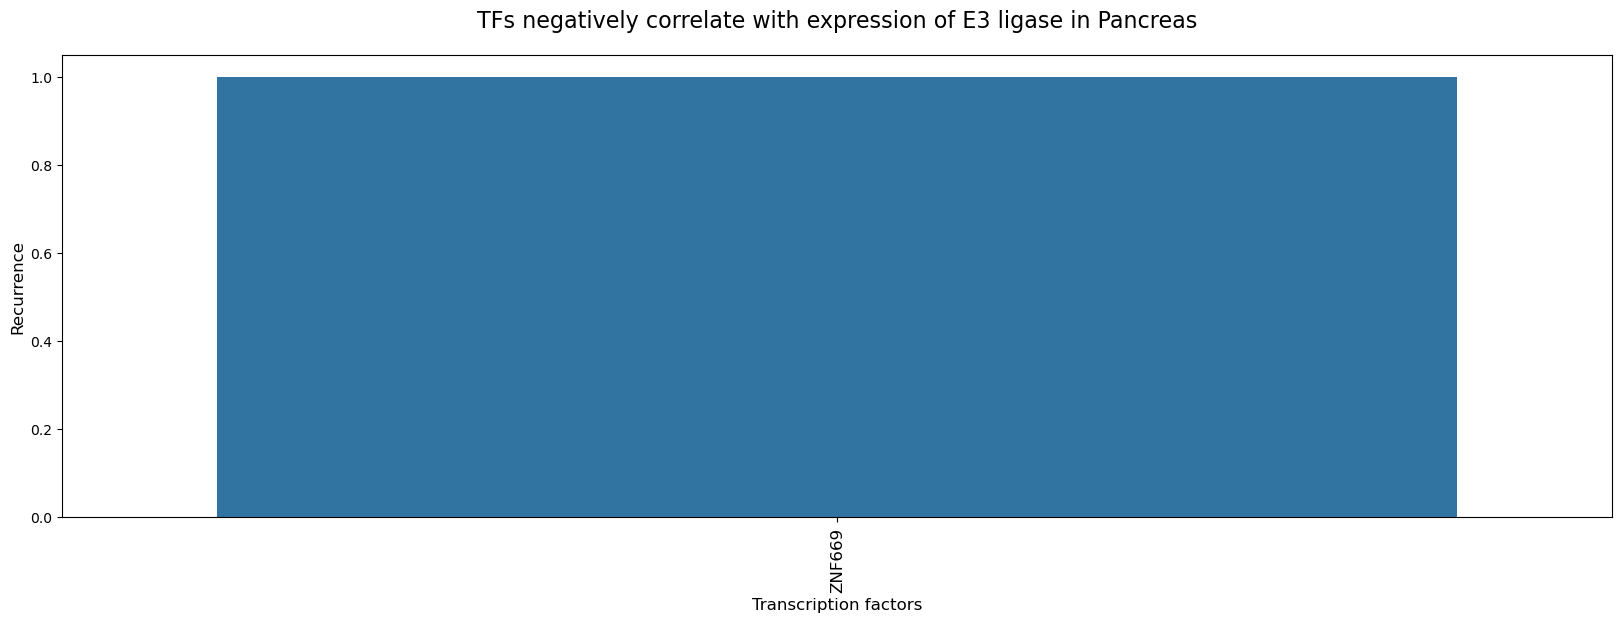

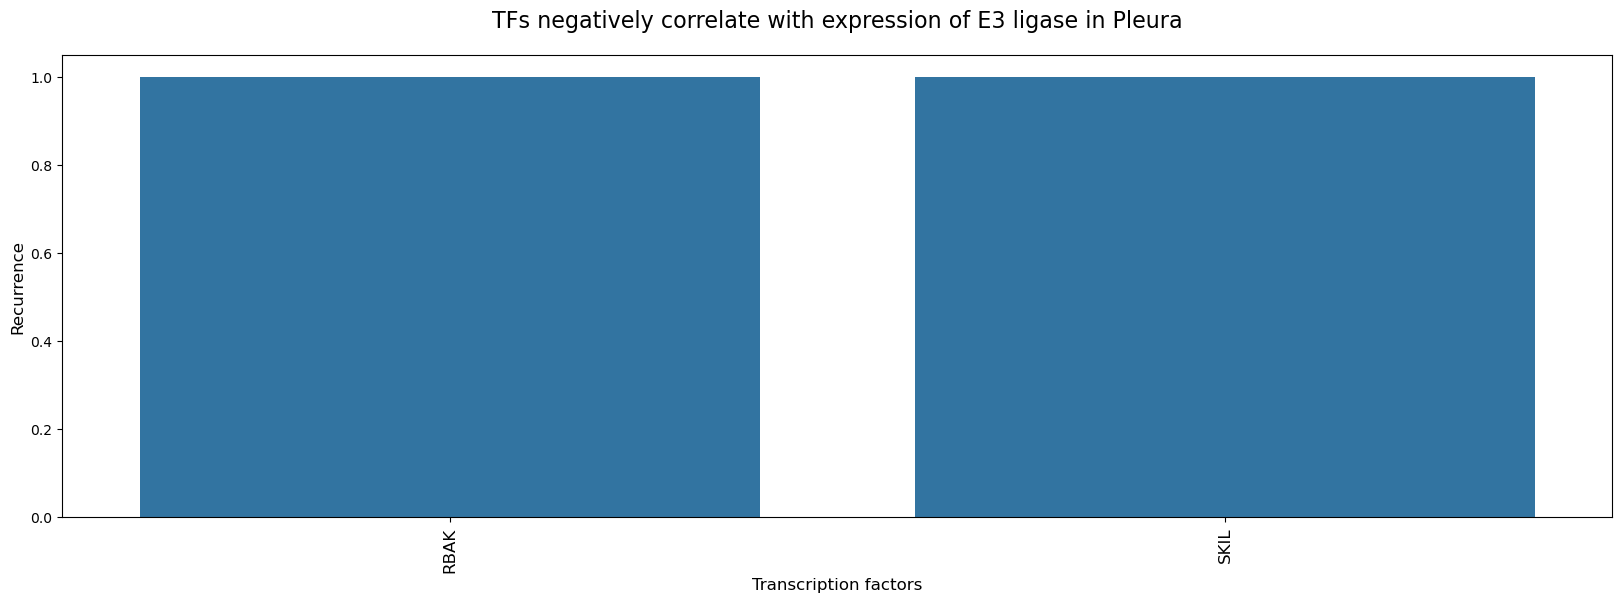

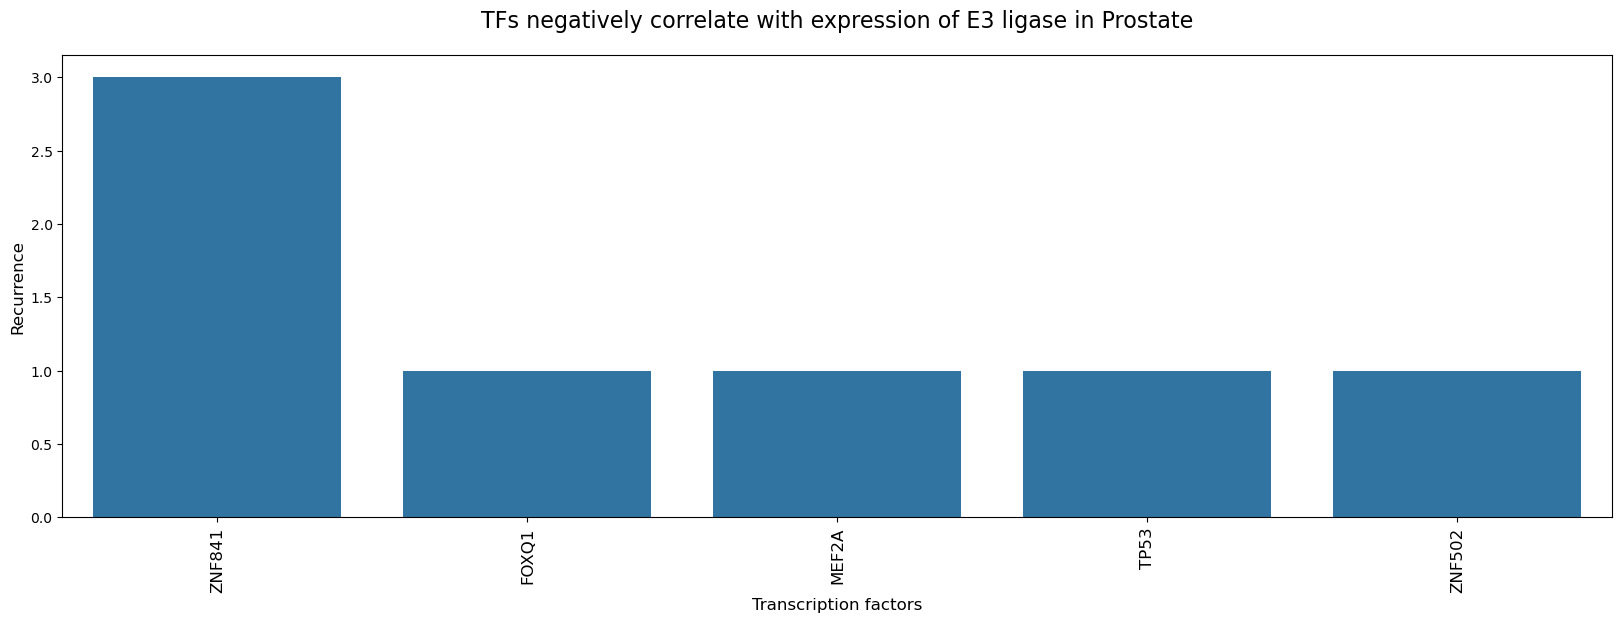

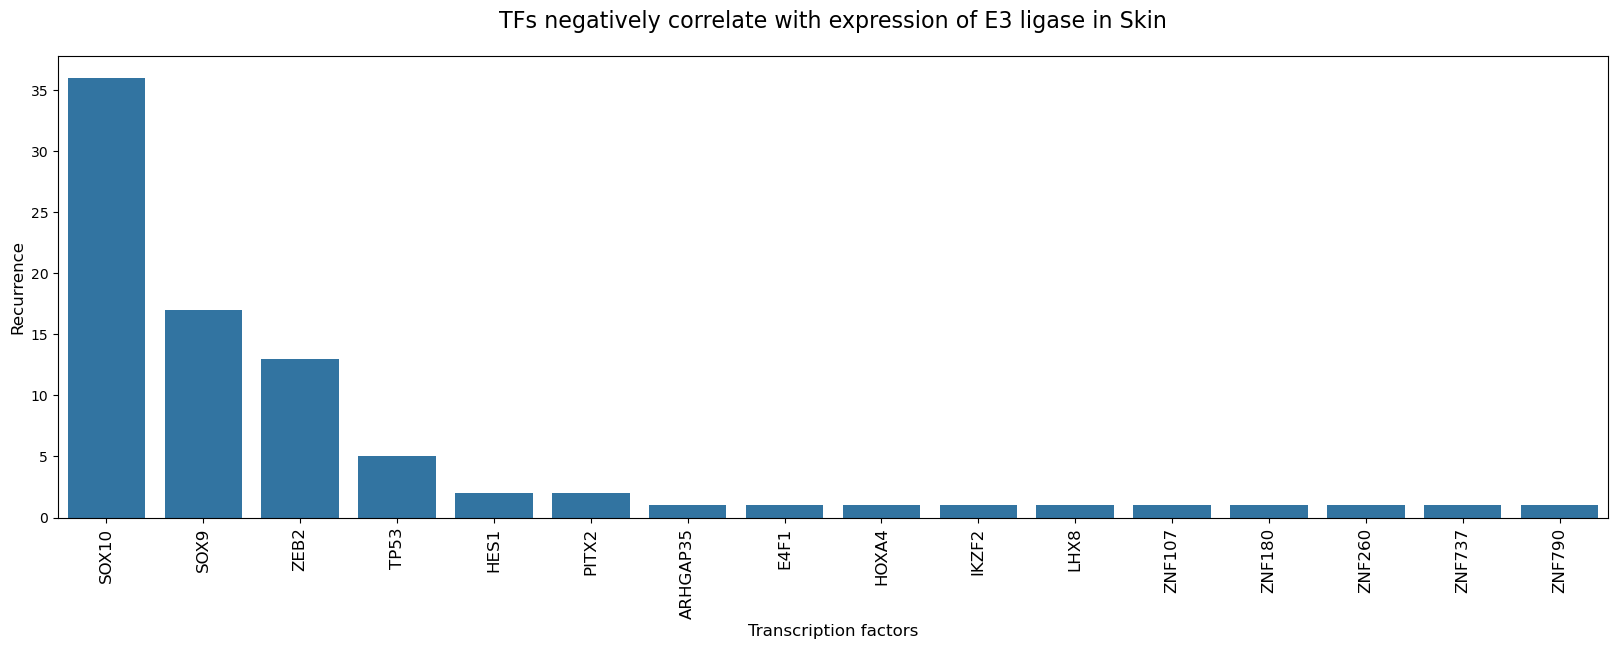

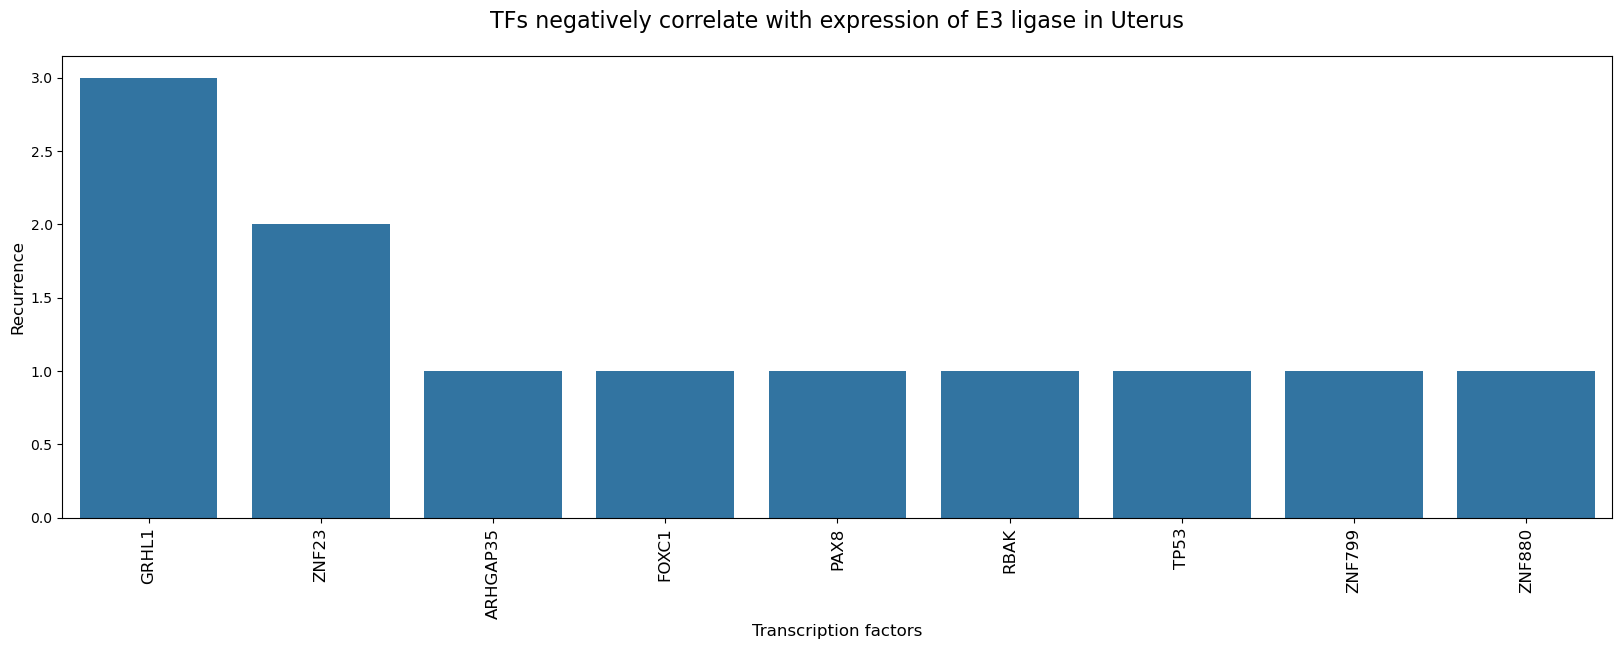

In [12]:
for lineage in tf_dependency_e3ls_expr_correlation_bylineage_fdr_significant['lineage'].unique(): 
    
    l_corr_f = tf_dependency_e3ls_expr_correlation_bylineage_fdr_significant.loc[tf_dependency_e3ls_expr_correlation_bylineage_fdr_significant['lineage'] == lineage,:]
    
    l_corr_f_count = l_corr_f.groupby('TF').nunique()
    
    l_corr_f_count_2 = pd.DataFrame(l_corr_f_count['corr'])
    
    l_corr_f_count_3=pd.DataFrame(l_corr_f_count_2.sort_values(by='corr',ascending=False)).reset_index()
    

    plt.figure(figsize = (20,6))
    
    sns.barplot(l_corr_f_count_3.head(25), x='TF', y= 'corr')

    plt.title(f'TFs negatively correlate with expression of E3 ligase in {lineage}', loc='center', fontsize=16, pad=20)
    plt.ylabel('Recurrence', fontsize=12)
    plt.xlabel('Transcription factors', fontsize=12)
    #plt.gca().set_xticklabels([])
    plt.xticks(rotation = 90, fontsize = 12)
    plt.show()

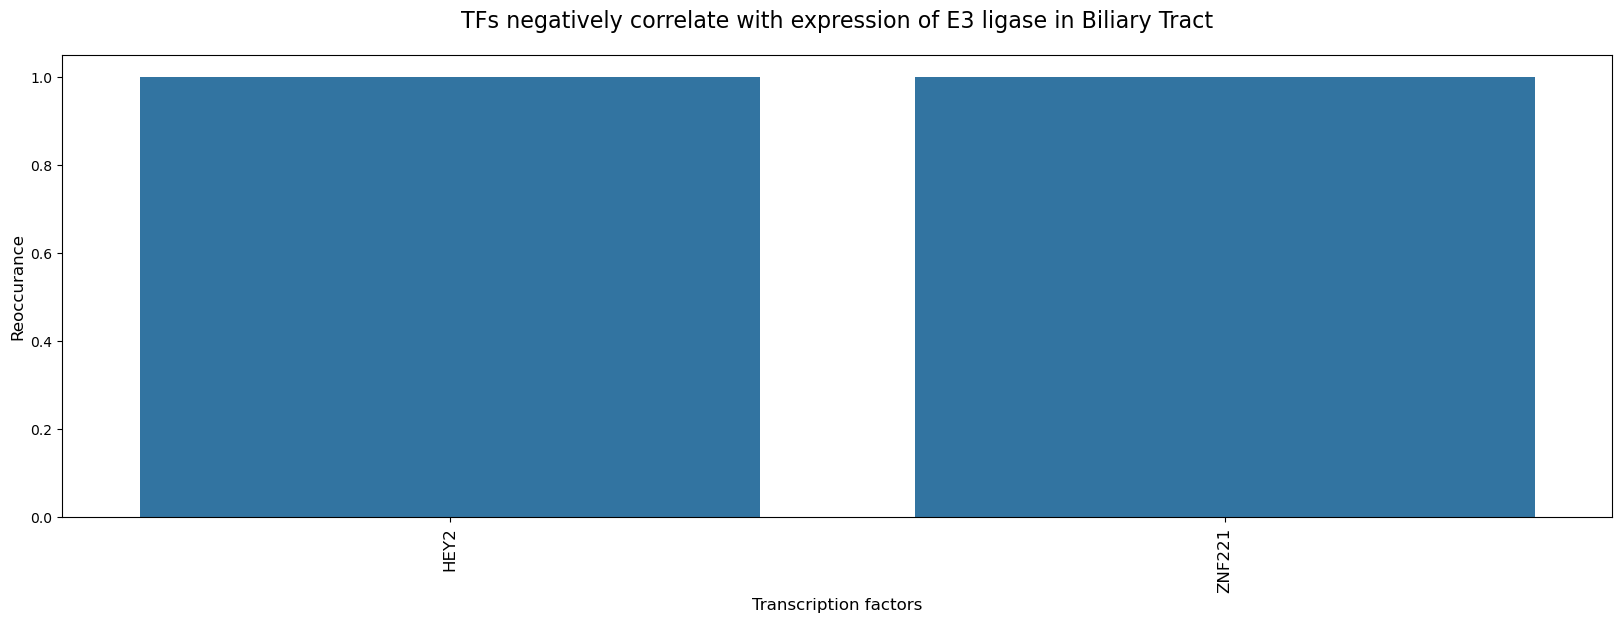

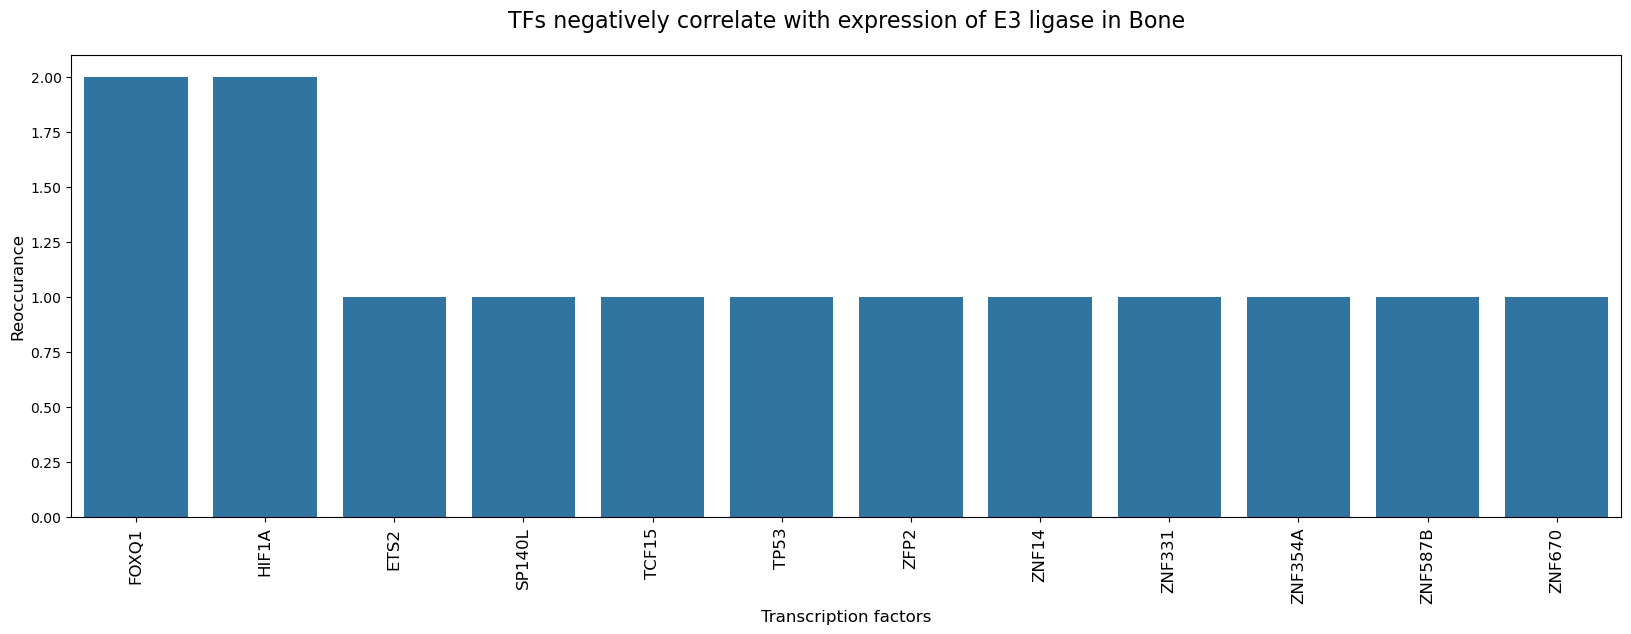

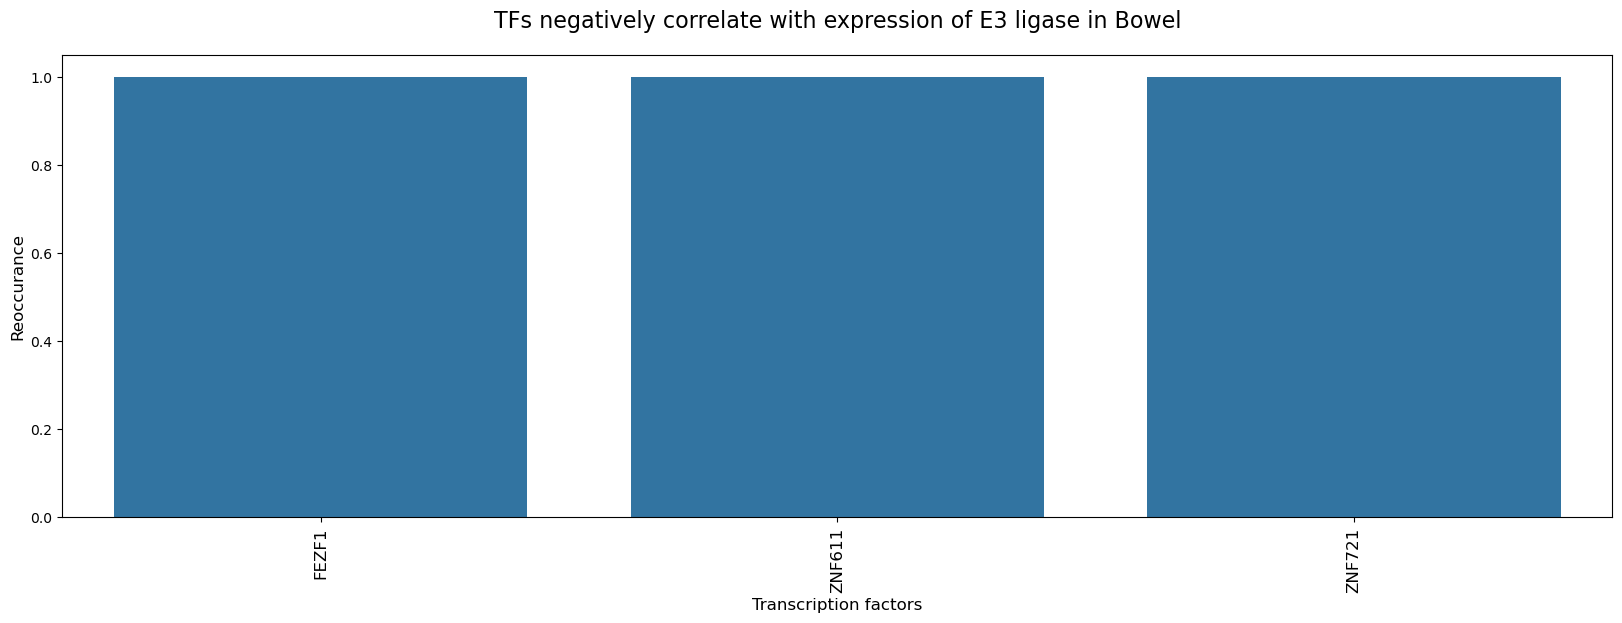

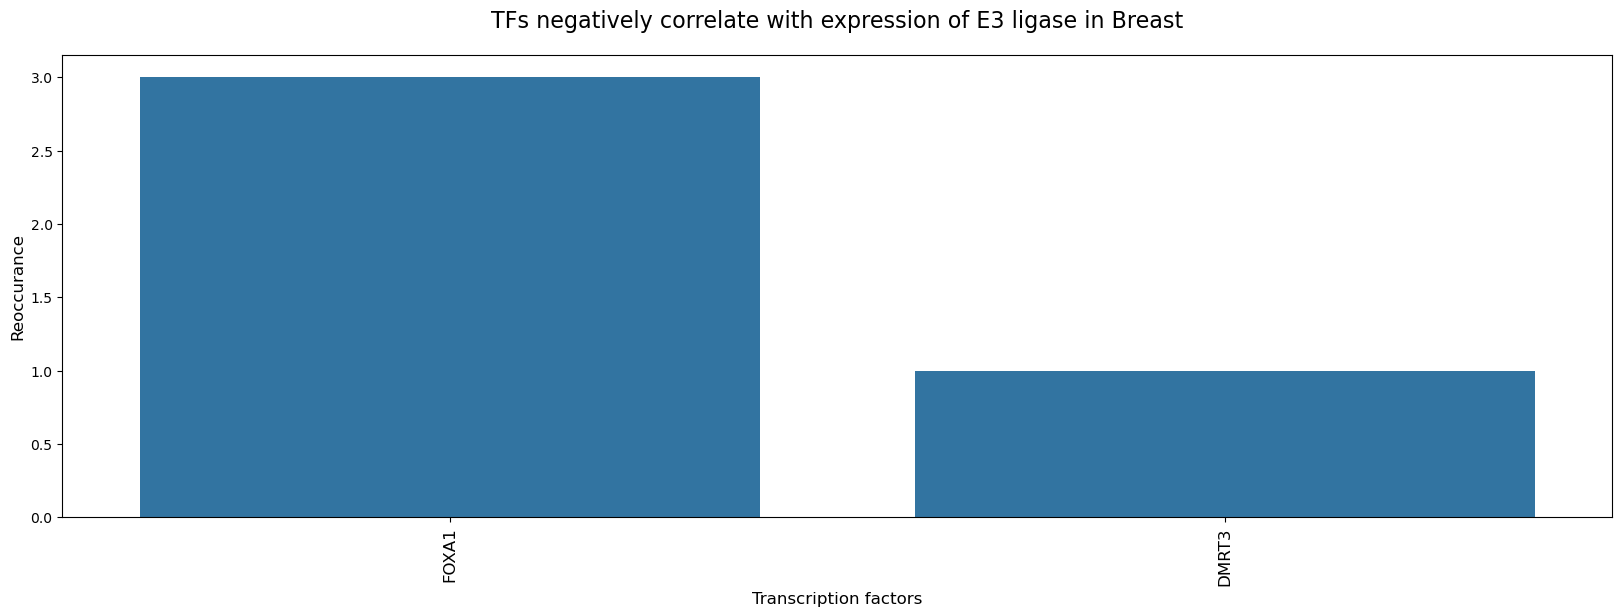

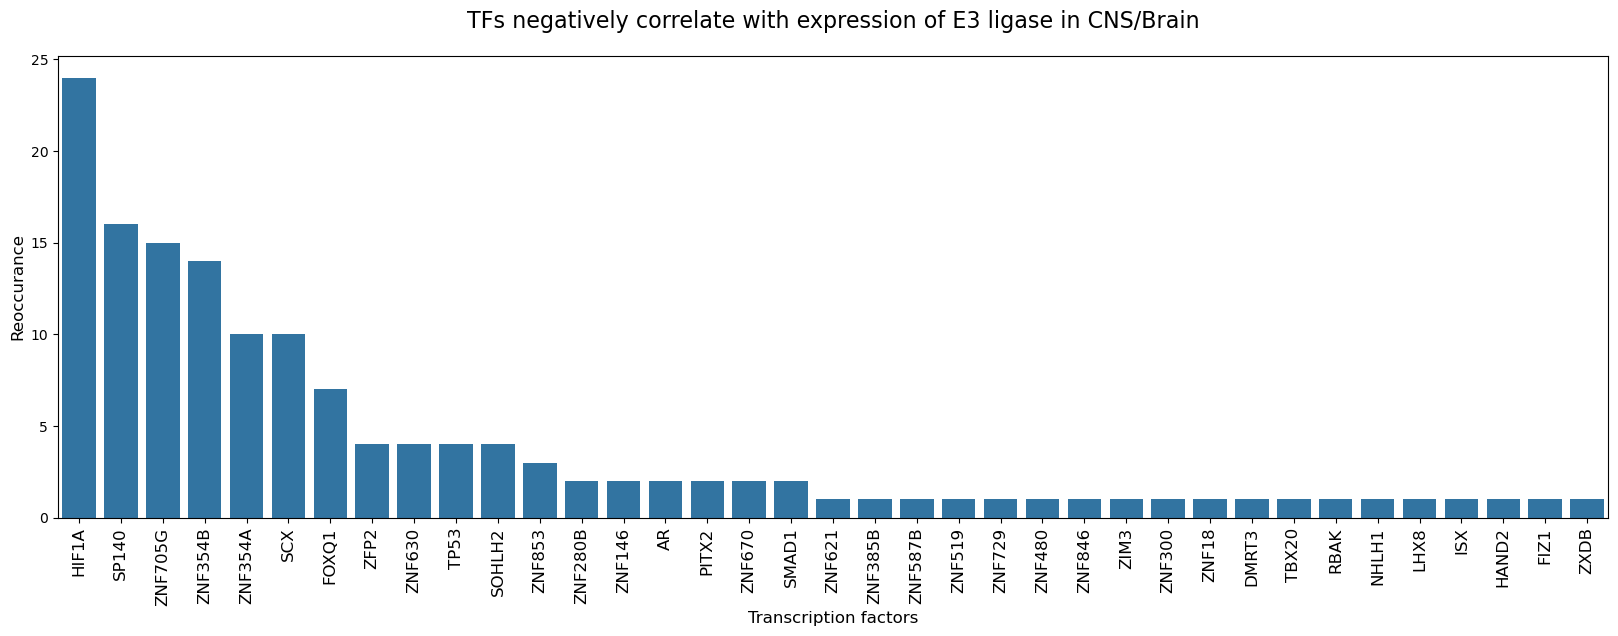

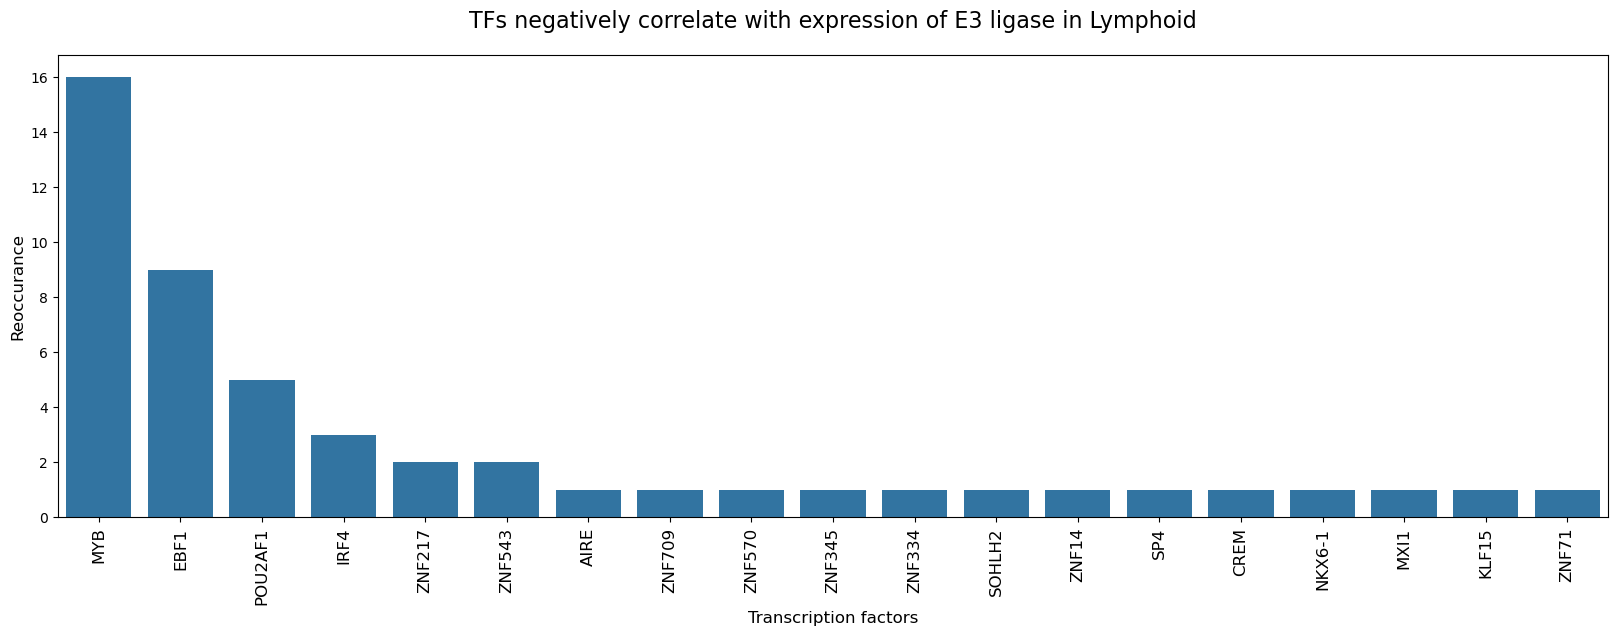

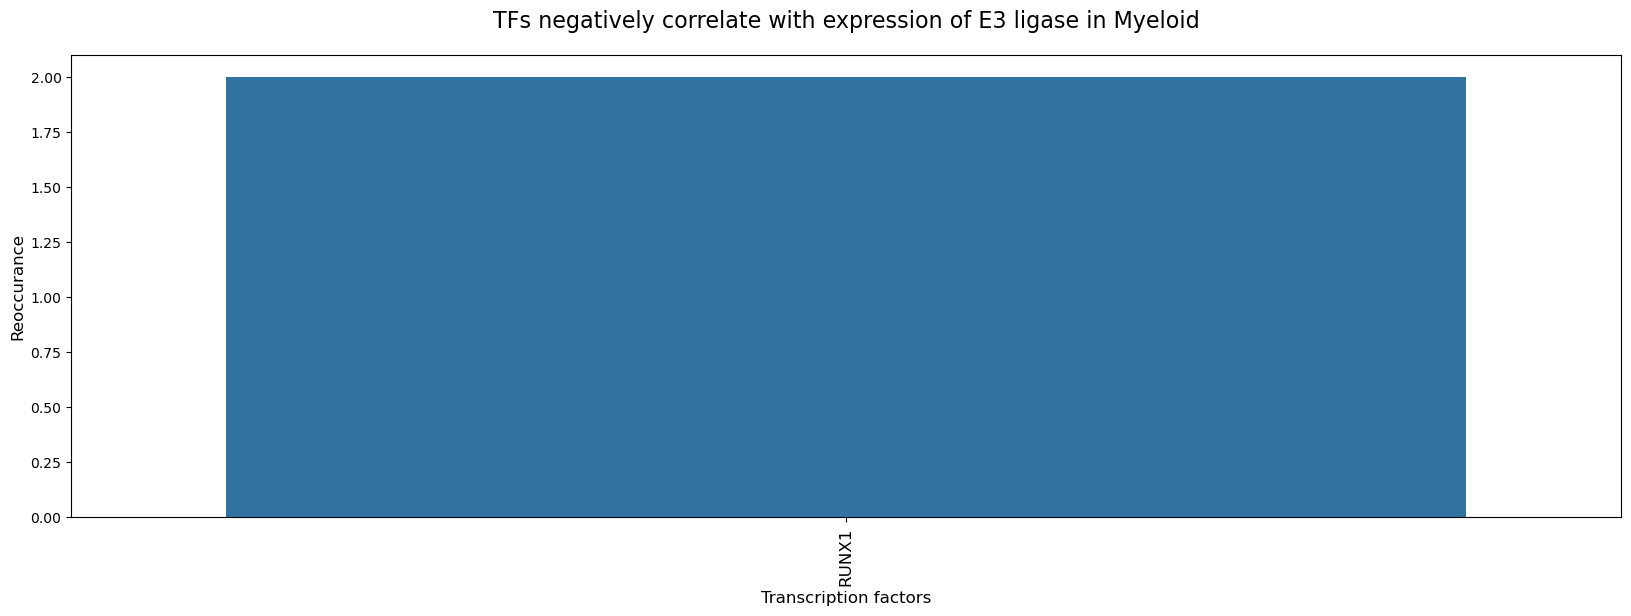

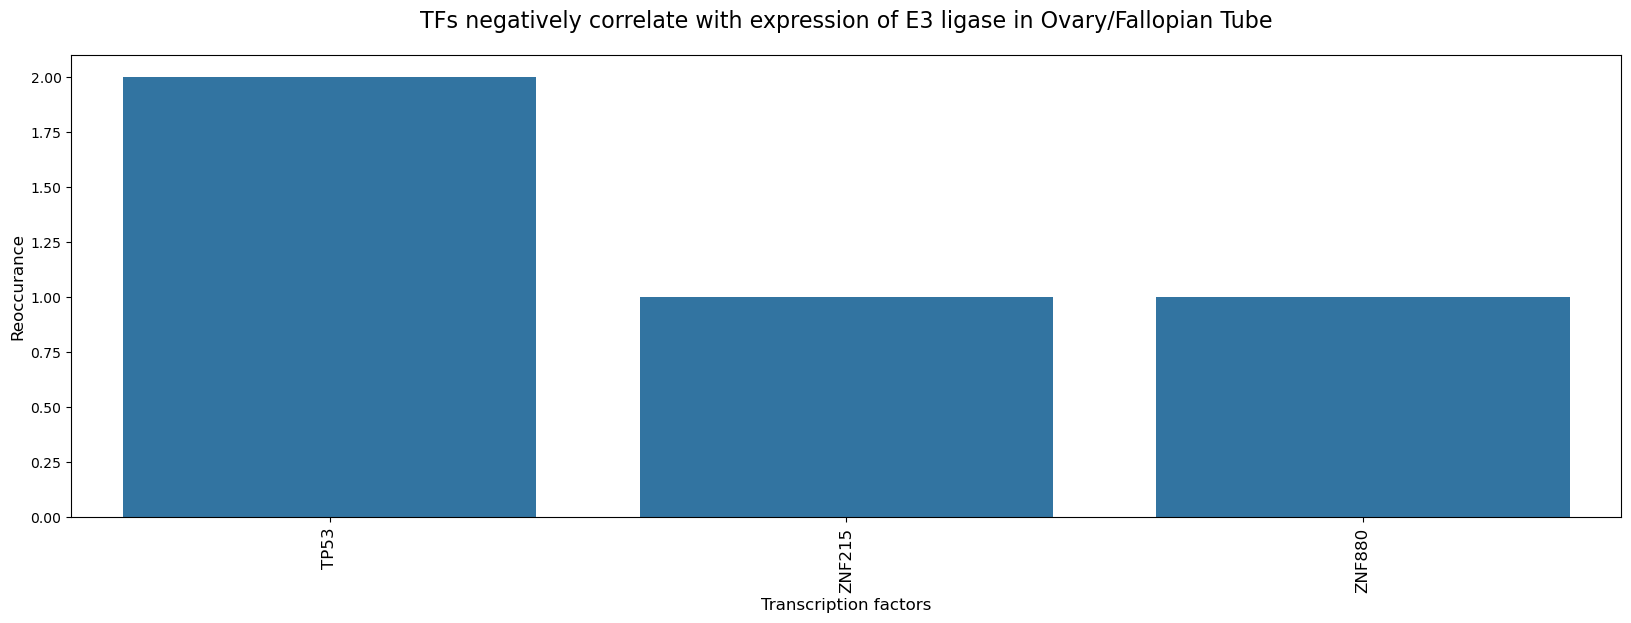

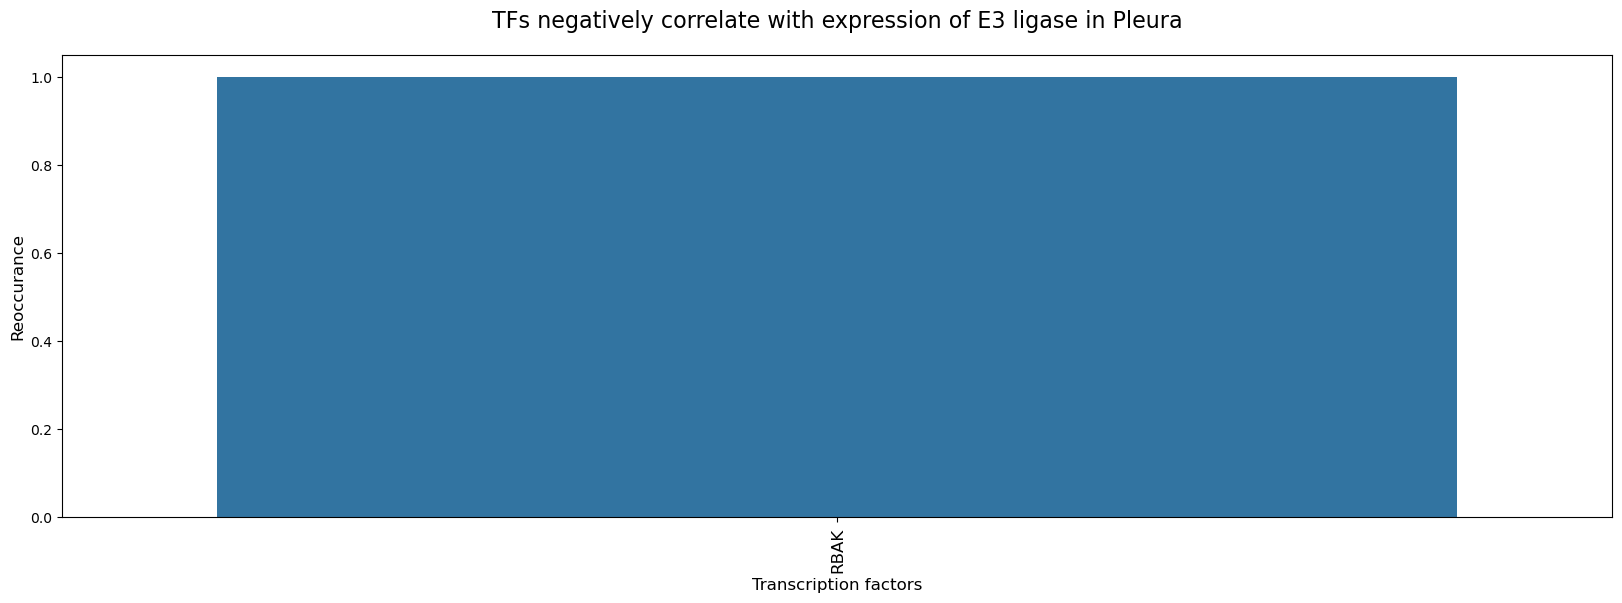

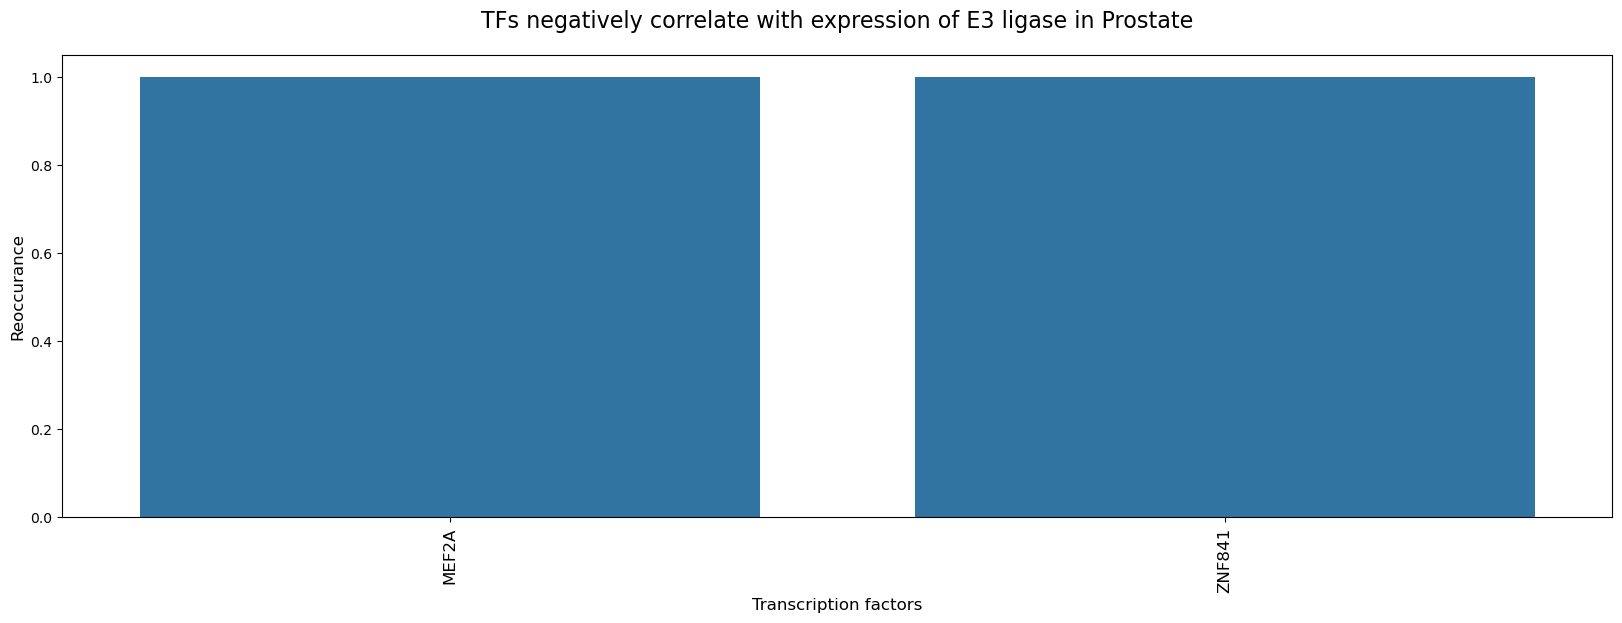

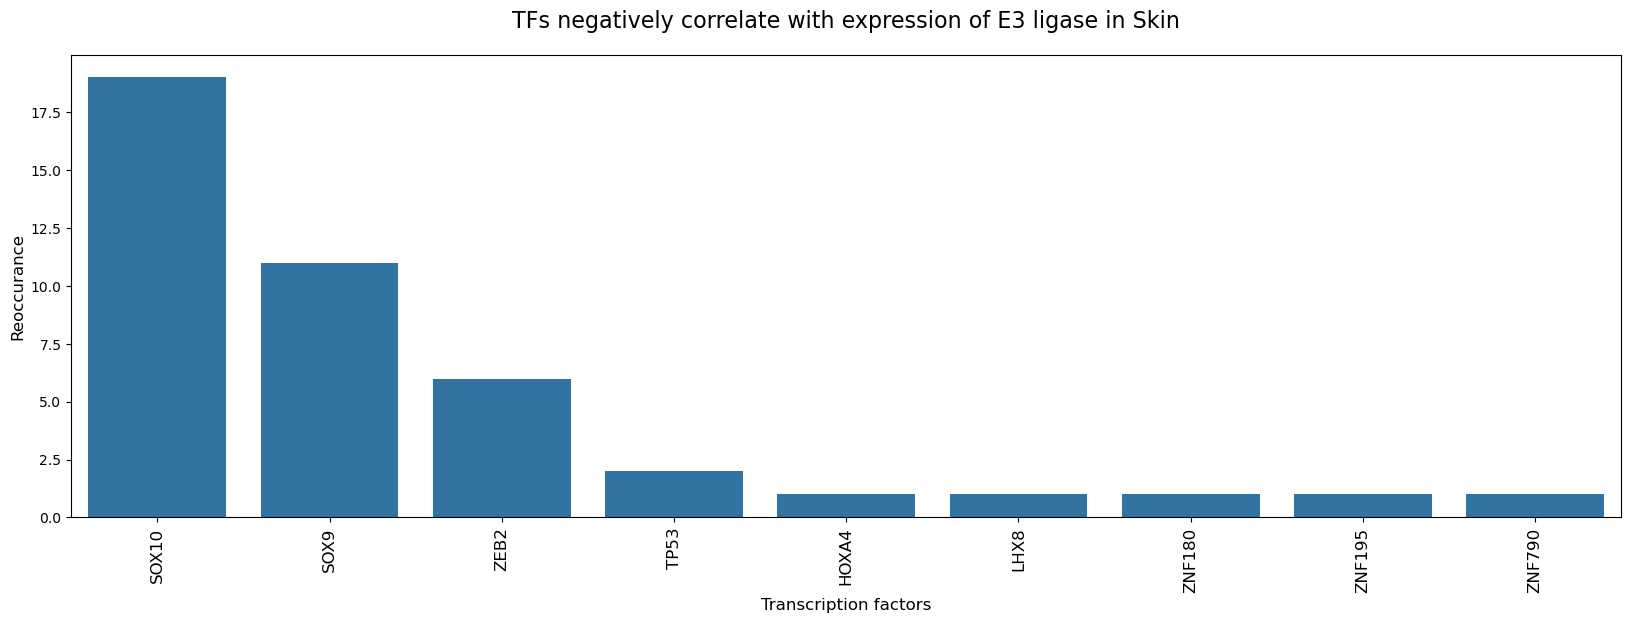

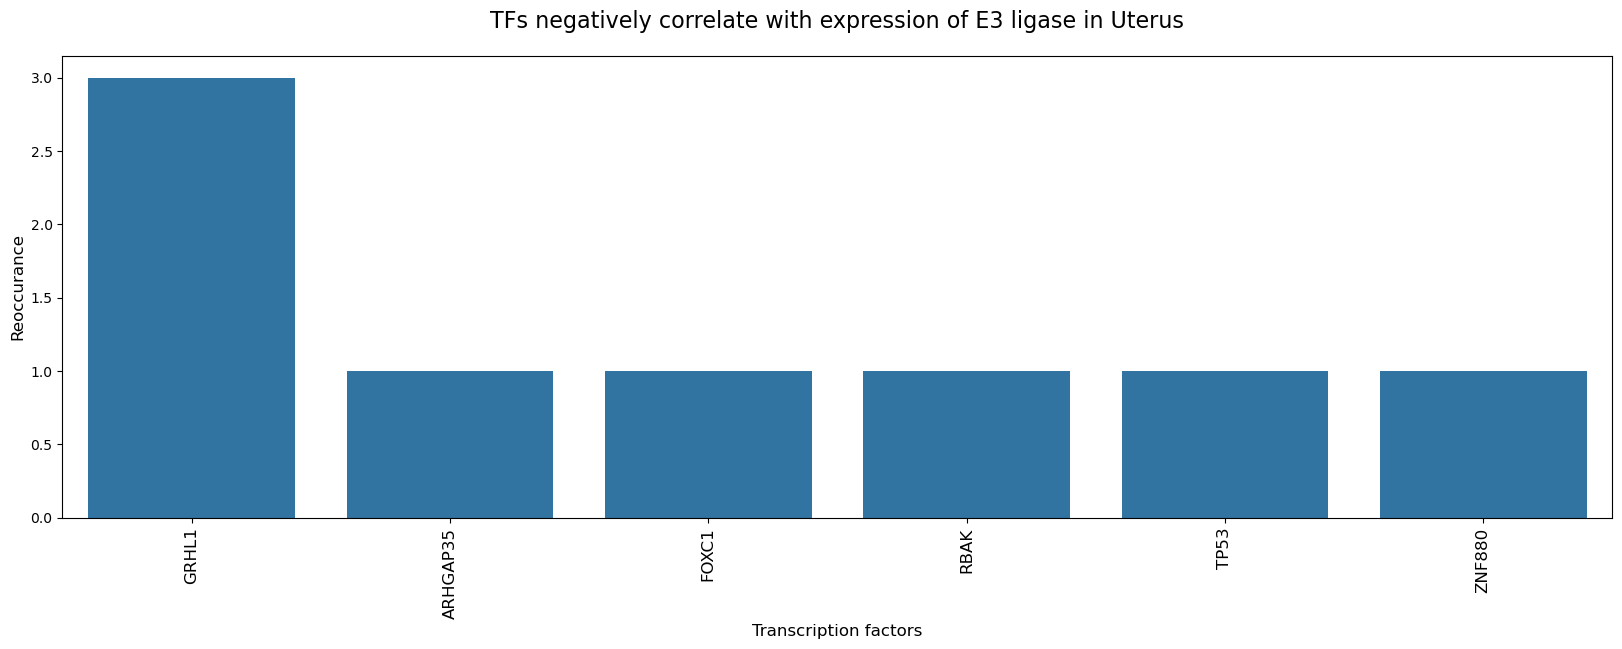

In [8]:
for lineage in tf_e3_corrs_fdrs_filtered['lineage'].unique(): 
    
    l_corr_f = tf_e3_corrs_fdrs_filtered.loc[tf_e3_corrs_fdrs_filtered['lineage'] == lineage,:]
    
    l_corr_f_count = l_corr_f.groupby('TF').nunique()
    
    l_corr_f_count_2 = pd.DataFrame(l_corr_f_count['corr'])
    
    l_corr_f_count_3=pd.DataFrame(l_corr_f_count_2.sort_values(by='corr',ascending=False)).reset_index()
    

    plt.figure(figsize = (20,6))
    
    sns.barplot(l_corr_f_count_3.head(40), x='TF', y= 'corr')

    plt.title(f'TFs negatively correlate with expression of E3 ligase in {lineage}', loc='center', fontsize=16, pad=20)
    plt.ylabel('Reoccurance', fontsize=12)
    plt.xlabel('Transcription factors', fontsize=12)
    #plt.gca().set_xticklabels([])
    plt.xticks(rotation = 90, fontsize = 12)
    plt.show()

In [9]:
tf_e3_corrs_fdrs_filtered.head()

,lineage,TF,E3_ligase,p-val,corr,TF-class,fdr,log10q
26689,Biliary Tract,ZNF221,TRIM26,0.000014,-0.655954,Positive,0.096379,1.016016
49506,Biliary Tract,HEY2,SOCS1,0.000016,-0.652490,Positive,0.098486,1.006626
112588,Bone,TCF15,BIRC3,0.000012,-0.548149,Positive,0.064524,1.190279
114708,Bone,ZNF331,E4F1,0.000025,-0.531406,Positive,0.079523,1.099508
126409,Bone,ETS2,RNF126,0.000007,-0.559985,Positive,0.064524,1.190279


In [10]:
tf_e3_corrs_fdrs_filtered.groupby("lineage").agg({"TF":"count"}).rename(columns={"TF":"count"}).reset_index().to_csv("pydata/pairs_count_bylineage.csv")